# Employee Attrition Prediction

Employee Attrition adalah pengurangan pegawai dengan alasan sukarela atau tidak sukarela bisa melalui pensiun, atau bisa melalui pengunduran diri, pemutusan kontrak, atau ketika perusahaan memutuskan untuk membuat posisi berlebihan.

## 1. The Data

Data yang digunakan adalah **IBM HR Analytics Employee Attrition & Performance Dataset** dari Kaggle dengan`34 variabel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
data=pd.read_csv('HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [4]:
data[data['JobRole'].str.contains('Manager')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,1,Female,78,2,4,Manager,4,Married,15427,22021,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,2,Female,83,3,5,Manager,1,Single,18947,22822,3,Y,No,12,3,4,80,0,22,2,2,2,2,2,1
65,55,No,Travel_Rarely,836,Research & Development,8,3,Medical,1,84,4,Female,33,3,4,Manager,3,Divorced,14756,19730,2,Y,Yes,14,3,3,80,3,21,2,3,5,0,0,2
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,140,3,Female,32,2,5,Manager,4,Married,18844,21922,9,Y,No,21,4,4,80,1,30,3,3,3,2,2,2
112,54,No,Non-Travel,142,Human Resources,26,3,Human Resources,1,148,4,Female,30,4,4,Manager,4,Single,17328,13871,2,Y,Yes,12,3,3,80,0,23,3,3,5,3,4,4
116,34,No,Travel_Rarely,1354,Research & Development,5,3,Medical,1,153,3,Female,45,2,3,Manager,1,Single,11631,5615,2,Y,No,12,3,4,80,0,14,6,3,11,10,5,8
119,43,No,Travel_Frequently,394,Sales,26,2,Life Sciences,1,158,3,Male,92,3,4,Manager,4,Married,16959,19494,1,Y,Yes,12,3,4,80,2,25,3,4,25,12,4,12
147,41,No,Travel_Frequently,857,Research & Development,10,3,Life Sciences,1,199,4,Male,91,2,4,Manager,1,Divorced,17181,12888,4,Y,No,13,3,2,80,1,21,2,2,7,6,7,7
165,50,No,Travel_Rarely,1452,Research & Development,11,3,Life Sciences,1,226,3,Female,53,3,5,Manager,2,Single,19926,17053,3,Y,No,15,3,2,80,0,21,5,3,5,4,4,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
data.describe(exclude='number')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


(array([3., 7., 7., 7., 7., 5., 5., 3., 4., 4.]),
 array([24. , 27.5, 31. , 34.5, 38. , 41.5, 45. , 48.5, 52. , 55.5, 59. ]),
 <a list of 10 Patch objects>)

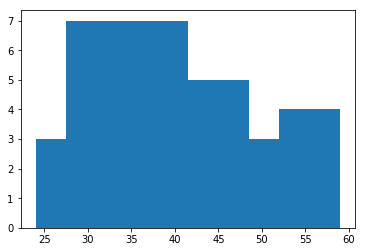

In [9]:
plt.hist('Age', data=data[data['NumCompaniesWorked']==9])

In [10]:
listItem = []
for col in data.columns:
    listItem.append([col, data[col].dtype, data[col].isna().sum(),
                   round((data[col].isna().sum()/len(data[col])) * 100,2),
                   data[col].nunique(), list(data[col].unique()[:2])])
    
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null',
                              'nullPct', 'unique', 'uniqueSample'], data=listItem)

dfDesc.sort_values("unique", ascending=False)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
9,EmployeeNumber,int64,0,0.0,1470,"[1, 2]"
19,MonthlyRate,int64,0,0.0,1427,"[19479, 24907]"
18,MonthlyIncome,int64,0,0.0,1349,"[5993, 5130]"
3,DailyRate,int64,0,0.0,886,"[1102, 279]"
12,HourlyRate,int64,0,0.0,71,"[94, 61]"
0,Age,int64,0,0.0,43,"[41, 49]"
28,TotalWorkingYears,int64,0,0.0,40,"[8, 10]"
31,YearsAtCompany,int64,0,0.0,37,"[6, 10]"
5,DistanceFromHome,int64,0,0.0,29,"[1, 8]"
32,YearsInCurrentRole,int64,0,0.0,19,"[4, 7]"


Drop variabel yang tidak berpengaruh seperti EmployeeNumber, repetitive variable (MonthlyRate, DailyRate, HourlyRate adalah Penjabaran dari Monthly Income), dan variabel yang hanya punya 1 value (StandardHours, Over18, EmployeeCount)

In [11]:
data=data.drop(['EmployeeNumber','MonthlyRate','DailyRate','HourlyRate','StandardHours','Over18','EmployeeCount'], axis=1)

In [12]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


## 2. EDA

### 1. Korelasi Antar Variabel

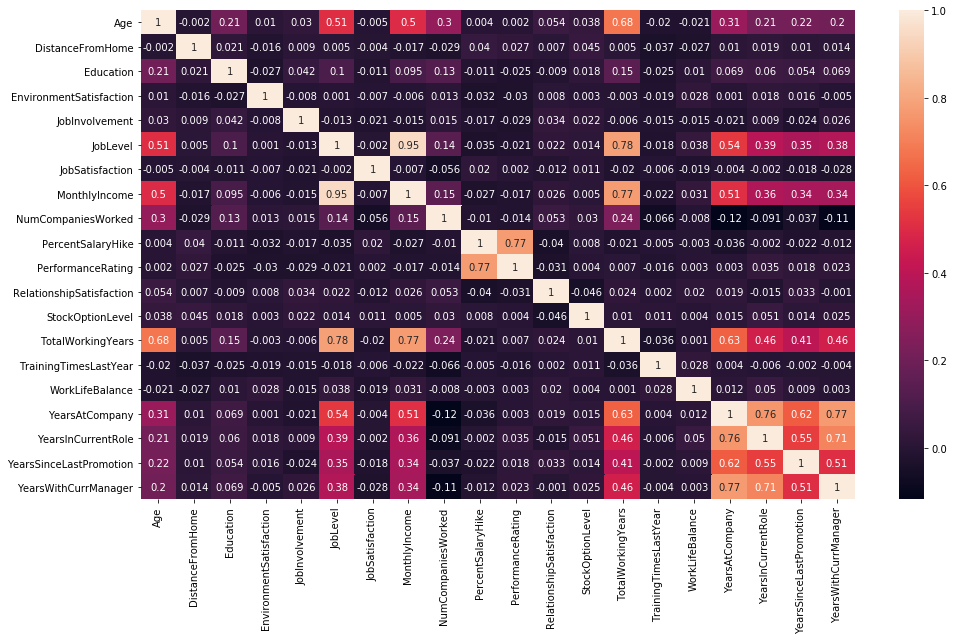

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(round(data.corr(),3),annot=True)
plt.show()

### 2. Jumlah Attrition

(array([0, 1]), <a list of 2 Text xticklabel objects>)

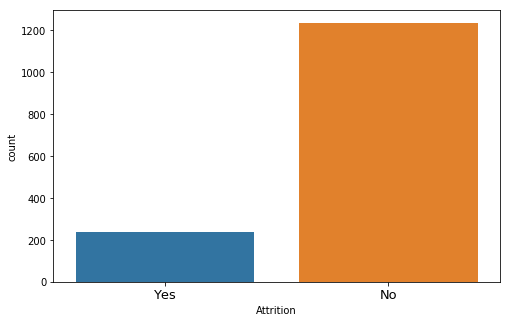

In [14]:
plt.figure(figsize=(8,5))
sns.countplot('Attrition', data=data)
plt.xticks(fontsize=13)
# plt.savefig('Att_Count')

In [15]:
data[data['Attrition']=='Yes'].describe().loc[['mean','std','min','max']]

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,33.607595,10.632911,2.839662,2.464135,2.518987,1.637131,2.468354,4787.092827,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,8.452525,1.008244,1.169791,0.773405,0.940594,1.118058,3640.210367,2.678519,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,58.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19859.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
data[data['Attrition']=='Yes'].describe(exclude='number')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,237,237,237,237,237,237,237,237
unique,1,3,3,6,2,9,3,2
top,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes
freq,237,156,133,89,150,62,120,127


### 3. Persentase Attrition Berdasarkan Gender

In [17]:
listItem = []
for att in data['Gender'].unique() :
    listItem.append([
        att,
        (len(
            data[(data['Gender'] == att) 
               & (data['Attrition'] == 'Yes')]
        )/len(data[data['Gender'] == att])) * 100,
        (len(
            data[(data['Gender'] == att) 
               & (data['Attrition'] == 'No')]
        )/len(data[data['Gender'] == att])) * 100
    ])
dfgender = pd.DataFrame(listItem, columns=['Gender','Attrition %','Not Attrition %'])
dfgender.sort_values(by=['Not Attrition %'], ascending=False)

,Gender,Attrition %,Not Attrition %
0,Female,14.795918,85.204082
1,Male,17.006803,82.993197


### 4. Attrition Berdasarkan Department

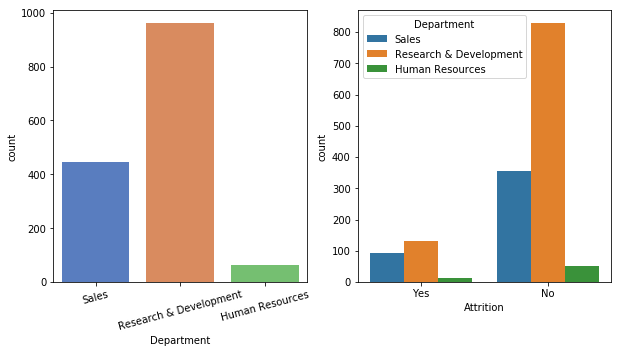

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Department', data=data, palette='muted')
plt.xticks(rotation=15)
plt.subplot(122)
sns.countplot(x='Attrition', hue='Department', data=data)
# plt.savefig('att_dept.png')

In [19]:
listItem = []
for att in data['Department'].unique() :
    listItem.append([
        att,
        (len(
            data[(data['Department'] == att) 
               & (data['Attrition'] == 'Yes')]
        )/len(data[data['Department'] == att])) * 100,
        (len(
            data[(data['Department'] == att) 
               & (data['Attrition'] == 'No')]
        )/len(data[data['Department'] == att])) * 100
    ])
dfgender = pd.DataFrame(listItem, columns=['Department','Attrition %','Not Attrition %'])
dfgender.sort_values(by=['Attrition %'], ascending=False)

,Department,Attrition %,Not Attrition %
0,Sales,20.627803,79.372197
2,Human Resources,19.047619,80.952381
1,Research & Development,13.839750,86.160250


### 5. Attrition Berdasarkan JobLevel

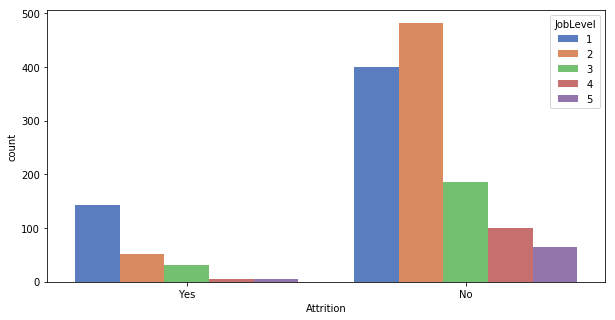

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Attrition', hue='JobLevel', data=data, palette='muted')
# plt.savefig('att_job')

### 6. Attrition Berdasarkan Kepuasan Lingkungan Kerja

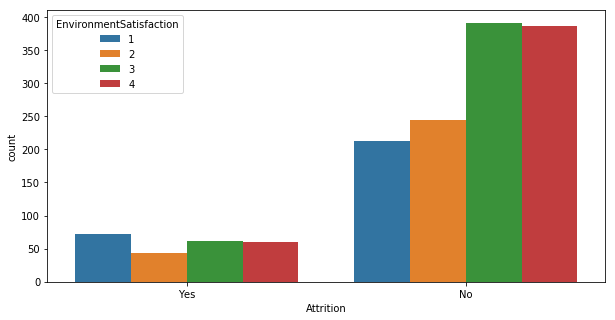

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Attrition', hue='EnvironmentSatisfaction', data=data)
# plt.savefig('att_env')

### 7. Attrition Berdasarkan Frekuensi Business Travel

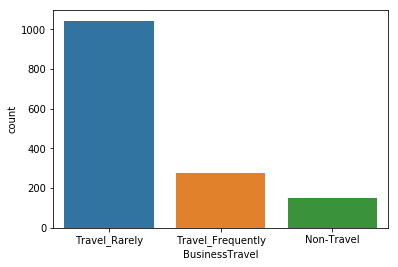

In [22]:
sns.countplot(data['BusinessTravel'])
# plt.savefig('att_buss')

### 8. Attrition Berdasarkan Overtime

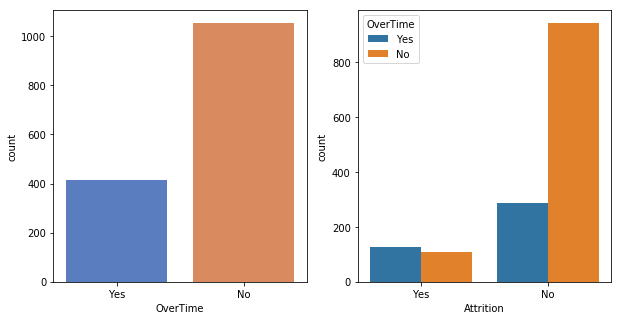

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='OverTime',data=data, palette='muted')
plt.subplot(122)
sns.countplot(x='Attrition', hue='OverTime', data=data)
# plt.savefig('att_overtime')

### 9. Distribution Plot Monthly Income dan Usia

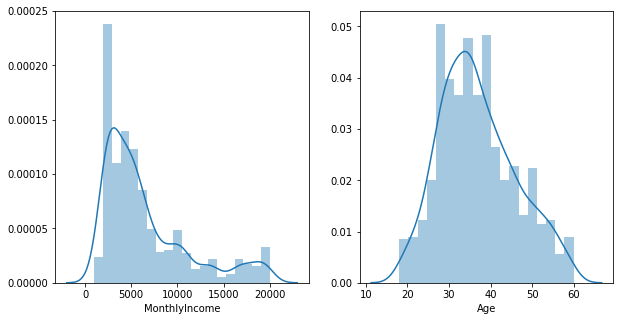

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(data['MonthlyIncome'])
plt.subplot(122)
sns.distplot(data['Age'])
# plt.savefig('att_dist')

### 10. Boxplot

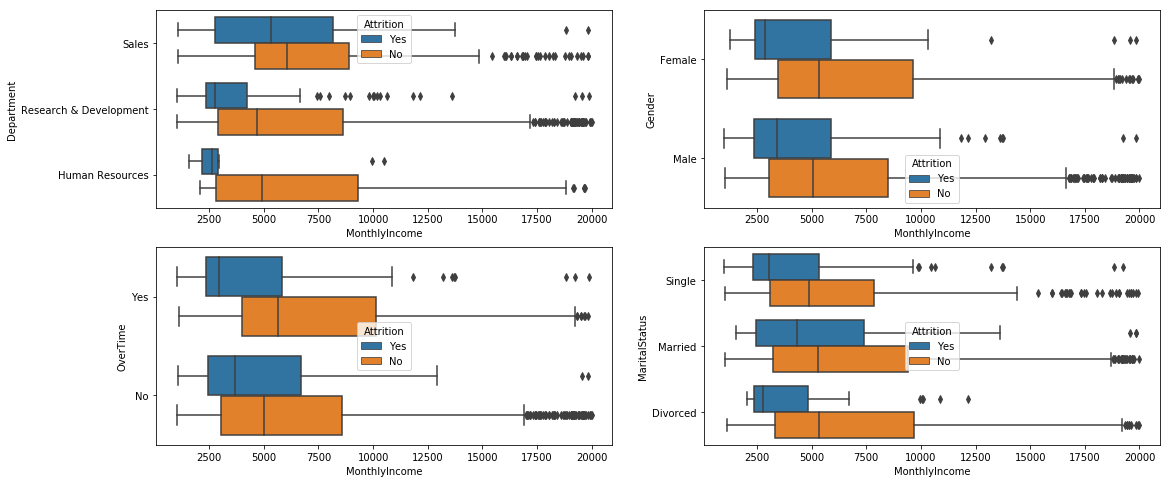

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(221)
sns.boxplot(y='Department', x='MonthlyIncome', hue='Attrition', data=data)
plt.subplot(222)
sns.boxplot(y='Gender', x='MonthlyIncome', hue='Attrition', data=data)
plt.subplot(223)
sns.boxplot(y='OverTime', x='MonthlyIncome', hue='Attrition',data=data)
plt.subplot(224)
sns.boxplot(y='MaritalStatus', x='MonthlyIncome', hue='Attrition',data=data)
# plt.savefig('att_boxplot')

In [26]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [27]:
data[data.columns[15:]].head()

,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,1,No,23,4,4,1,10,3,3,10,7,1,7
2,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,9,No,12,3,4,1,6,3,3,2,2,2,2


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label=LabelEncoder()
data['BusinessTravel']=label.fit_transform(data['BusinessTravel'])
data['Attrition']=label.fit_transform(data['Attrition'])

In [30]:
final_data=pd.get_dummies(data, columns=['Department','EducationField','JobRole','MaritalStatus','Gender','OverTime'], drop_first=True)

In [31]:
final_data.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,OverTime_Yes
0,41,1,2,1,2,2,3,2,4,5993,8,11,3,1,0,8,0,1,6,4,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,49,0,1,8,1,3,2,2,2,5130,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,37,1,2,2,2,4,2,1,3,2090,6,15,3,2,0,7,3,3,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1
3,33,0,1,3,4,4,3,1,3,2909,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,27,0,2,2,1,1,3,1,2,3468,9,12,3,4,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0


## 3. Training The Model

### 3.1 Feature Extraction Using Chi Square

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X=final_data.drop('Attrition', axis=1)
y=final_data['Attrition']

X_norm = MinMaxScaler().fit_transform(X)
# chi_selector = SelectKBest(chi2, k=40)
# chi_selector.fit(X_norm, y)
# chi_support = chi_selector.get_support()
# chi_feature = X.loc[:,chi_support].columns.tolist()
# print(str(len(chi_feature)), 'selected features')
chi=chi2(X_norm, y)
feature=list(chi[0])
dflist=[]
for f,s in zip(X.columns.tolist(),feature):
    if s > 3.84146:
        dflist.append([f,s,'Selected'])
    else:
        dflist.append([f,s,'Not Selected'])
    
dffeat=pd.DataFrame(dflist, columns=['Feature', 'ChiSquare','Selection']).sort_values("Feature", ascending=True)
print(dffeat)
print('---------')
print('Selected Variables: ',len(dffeat[dffeat['Selection']=='Selected']))
selected_columns=list(dffeat[dffeat['Selection']=='Selected']['Feature'])

                              Feature  ChiSquare     Selection
0                                 Age   3.909579      Selected
1                      BusinessTravel   0.000001  Not Selected
21  Department_Research & Development   3.702916  Not Selected
22                   Department_Sales   6.694465      Selected
2                    DistanceFromHome   2.555583  Not Selected
3                           Education   0.198203  Not Selected
23       EducationField_Life Sciences   0.924044  Not Selected
24           EducationField_Marketing   4.079154      Selected
25             EducationField_Medical   2.222133  Not Selected
26               EducationField_Other   0.444606  Not Selected
27    EducationField_Technical Degree   6.435860      Selected
4             EnvironmentSatisfaction   3.630879  Not Selected
38                        Gender_Male   0.510087  Not Selected
5                      JobInvolvement   2.422642  Not Selected
6                            JobLevel  12.094895      S

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score, recall_score, precision_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(final_data[selected_columns], final_data['Attrition'], test_size=0.2, random_state=123)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
rfc=RandomForestClassifier(n_estimators=100, random_state=123)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [38]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

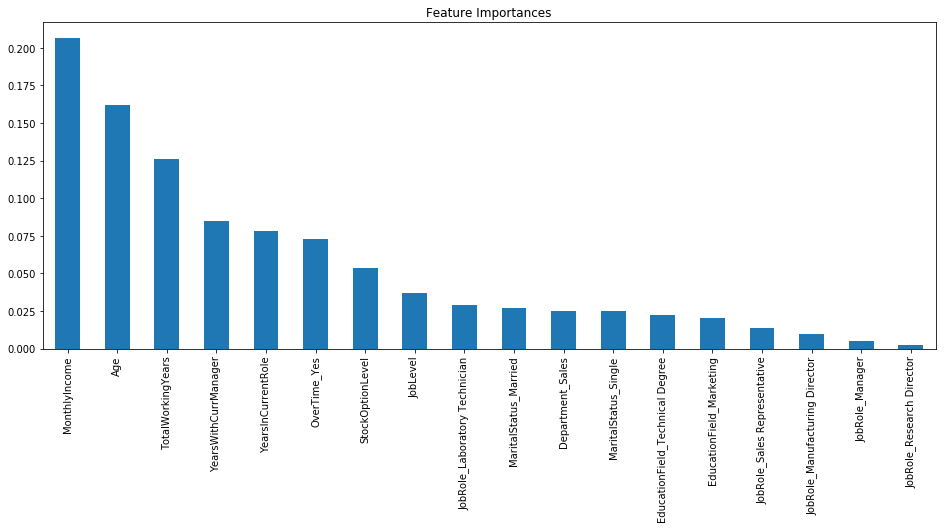

In [39]:
plt.figure(figsize=(16,6))
coef_chi=pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending=False)
coef_chi.plot(kind='bar', title='Feature Importances')

In [40]:
coef_chi

MonthlyIncome                      0.206524
Age                                0.161697
TotalWorkingYears                  0.125986
YearsWithCurrManager               0.084983
YearsInCurrentRole                 0.078219
OverTime_Yes                       0.072657
StockOptionLevel                   0.053386
JobLevel                           0.036995
JobRole_Laboratory Technician      0.028679
MaritalStatus_Married              0.026834
Department_Sales                   0.025161
MaritalStatus_Single               0.024913
EducationField_Technical Degree    0.022443
EducationField_Marketing           0.020650
JobRole_Sales Representative       0.013789
JobRole_Manufacturing Director     0.009795
JobRole_Manager                    0.005101
JobRole_Research Director          0.002189
dtype: float64

In [41]:
predictTrain_chisquare_rfc=rfc.predict(X_train)
predictTest_chisquare_rfc=rfc.predict(X_test)

In [42]:
print(classification_report(y_train,predictTrain_chisquare_rfc))
print('---------------')
print(classification_report(y_test,predictTest_chisquare_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00       199

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

---------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       256
           1       0.67      0.26      0.38        38

    accuracy                           0.89       294
   macro avg       0.78      0.62      0.66       294
weighted avg       0.87      0.89      0.87       294



In [43]:
precision_chisquare_rfc=precision_score(y_test,predictTest_chisquare_rfc)
recall_chisquare_rfc=recall_score(y_test,predictTest_chisquare_rfc)
accuracy_chisquare_rfc=accuracy_score(y_test,predictTest_chisquare_rfc)

In [44]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
predictTrain_chisquare_gbc=gbc.predict(X_train)
predictTest_chisquare_gbc=gbc.predict(X_test)

In [46]:
print(classification_report(y_train,predictTrain_chisquare_gbc))
print('-----------')
print(classification_report(y_test,predictTest_chisquare_gbc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       977
           1       0.92      0.46      0.62       199

    accuracy                           0.90      1176
   macro avg       0.91      0.73      0.78      1176
weighted avg       0.90      0.90      0.89      1176

-----------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       256
           1       0.52      0.34      0.41        38

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.67       294
weighted avg       0.86      0.87      0.86       294



In [47]:
precision_chisquare_gbc=precision_score(y_test,predictTest_chisquare_rfc)
recall_chisquare_gbc=recall_score(y_test,predictTest_chisquare_rfc)
accuracy_chisquare_gbc=accuracy_score(y_test,predictTest_chisquare_rfc)

#### Pada Feature Selection Chi Square, ketepatan klasifikasi terbaik dihasilkan dengan algorithm GBC

### 3.2 Feature Selection Dengan Feature Importances RFC

In [48]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('Attrition', axis=1), final_data['Attrition'], test_size=0.2, random_state=123)

In [49]:
rfc=RandomForestClassifier(n_estimators=100, random_state=123)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [50]:
predictTrain_rfc_1=rfc.predict(X_train)
predictTest_rfc_1=rfc.predict(X_test)

In [51]:
print(classification_report(y_train,predictTrain_rfc_1))
print('------------')
print(classification_report(y_test,predictTest_rfc_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00       199

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       256
           1       0.79      0.29      0.42        38

    accuracy                           0.90       294
   macro avg       0.84      0.64      0.68       294
weighted avg       0.89      0.90      0.88       294



In [52]:
precision_rfc_1=precision_score(y_test,predictTest_rfc_1)
recall__rfc_1=recall_score(y_test,predictTest_rfc_1)
accuracy__rfc_1=accuracy_score(y_test,predictTest_rfc_1)

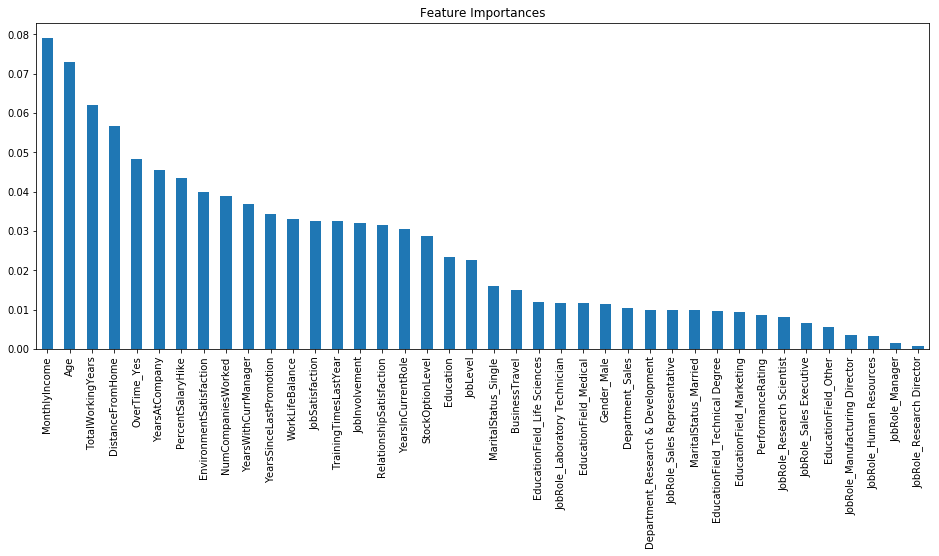

In [53]:
plt.figure(figsize=(16,6))
coef_rfc=pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending=False)
coef_rfc.plot(kind='bar', title='Feature Importances')

In [54]:
coef_rfc

MonthlyIncome                        0.078968
Age                                  0.072885
TotalWorkingYears                    0.062080
DistanceFromHome                     0.056780
OverTime_Yes                         0.048363
YearsAtCompany                       0.045384
PercentSalaryHike                    0.043556
EnvironmentSatisfaction              0.040014
NumCompaniesWorked                   0.038822
YearsWithCurrManager                 0.036748
YearsSinceLastPromotion              0.034337
WorkLifeBalance                      0.032971
JobSatisfaction                      0.032519
TrainingTimesLastYear                0.032514
JobInvolvement                       0.032082
RelationshipSatisfaction             0.031483
YearsInCurrentRole                   0.030580
StockOptionLevel                     0.028627
Education                            0.023373
JobLevel                             0.022615
MaritalStatus_Single                 0.016056
BusinessTravel                    

In [55]:
# Drop feature dengan nilai importances rendah (<0.2)
coldrop=list(coef_rfc[coef_rfc<0.015].index)
coldrop

['EducationField_Life Sciences',
 'JobRole_Laboratory Technician',
 'EducationField_Medical',
 'Gender_Male',
 'Department_Sales',
 'Department_Research & Development',
 'JobRole_Sales Representative',
 'MaritalStatus_Married',
 'EducationField_Technical Degree',
 'EducationField_Marketing',
 'PerformanceRating',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'EducationField_Other',
 'JobRole_Manufacturing Director',
 'JobRole_Human Resources',
 'JobRole_Manager',
 'JobRole_Research Director']

In [56]:
final_data_rfc=final_data.drop(coldrop,axis=1)

In [57]:
final_data_rfc.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus_Single,OverTime_Yes
0,41,1,2,1,2,2,3,2,4,5993,8,11,1,0,8,0,1,6,4,0,5,1,1
1,49,0,1,8,1,3,2,2,2,5130,1,23,4,1,10,3,3,10,7,1,7,0,0
2,37,1,2,2,2,4,2,1,3,2090,6,15,2,0,7,3,3,0,0,0,0,1,1
3,33,0,1,3,4,4,3,1,3,2909,1,11,3,0,8,3,3,8,7,3,0,0,1
4,27,0,2,2,1,1,3,1,2,3468,9,12,4,1,6,3,3,2,2,2,2,0,0


### 3.2.1. Random Forest Classifier After Feature Selection

In [58]:
X_train, X_test, y_train, y_test = train_test_split(final_data_rfc.drop('Attrition', axis=1), final_data_rfc['Attrition'], test_size=0.2, random_state=123)

In [59]:
rfc=RandomForestClassifier(n_estimators=100, random_state=123)

In [60]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

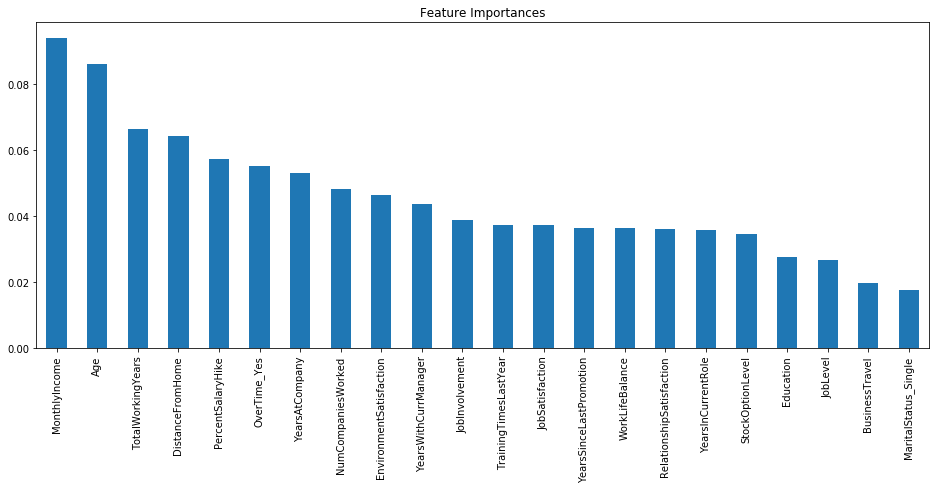

In [61]:
plt.figure(figsize=(16,6))
coef_rfc_2=pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending=False)
coef_rfc_2.plot(kind='bar', title='Feature Importances')

In [62]:
coef_rfc_2

MonthlyIncome               0.094067
Age                         0.086061
TotalWorkingYears           0.066342
DistanceFromHome            0.064455
PercentSalaryHike           0.057246
OverTime_Yes                0.055170
YearsAtCompany              0.052981
NumCompaniesWorked          0.048298
EnvironmentSatisfaction     0.046411
YearsWithCurrManager        0.043609
JobInvolvement              0.038770
TrainingTimesLastYear       0.037394
JobSatisfaction             0.037372
YearsSinceLastPromotion     0.036607
WorkLifeBalance             0.036569
RelationshipSatisfaction    0.036101
YearsInCurrentRole          0.035758
StockOptionLevel            0.034742
Education                   0.027698
JobLevel                    0.026836
BusinessTravel              0.019904
MaritalStatus_Single        0.017611
dtype: float64

In [63]:
predictTrain_rfc_2=rfc.predict(X_train)
predictTest_rfc_2=rfc.predict(X_test)

In [64]:
print(classification_report(y_train,predictTrain_rfc_2))
print('-----------')
print(classification_report(y_test,predictTest_rfc_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00       199

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

-----------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       256
           1       0.79      0.29      0.42        38

    accuracy                           0.90       294
   macro avg       0.84      0.64      0.68       294
weighted avg       0.89      0.90      0.88       294



In [65]:
precision_rfc_2=precision_score(y_test,predictTest_rfc_2)
recall__rfc_2=recall_score(y_test,predictTest_rfc_2)
accuracy__rfc_2=accuracy_score(y_test,predictTest_rfc_2)

### 3.3 Feature Selection Dengan Gradient Boosting Classifier

In [66]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('Attrition', axis=1), final_data['Attrition'], test_size=0.2, random_state=123)

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
predictTrain_gbc_1=gbc.predict(X_train)
predictTest_gbc_1=gbc.predict(X_test)

In [69]:
print(classification_report(y_train,predictTrain_gbc_1))
print('--------------')
print(classification_report(y_test,predictTest_gbc_1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       977
           1       0.99      0.71      0.83       199

    accuracy                           0.95      1176
   macro avg       0.97      0.86      0.90      1176
weighted avg       0.95      0.95      0.95      1176

--------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       256
           1       0.82      0.37      0.51        38

    accuracy                           0.91       294
   macro avg       0.87      0.68      0.73       294
weighted avg       0.90      0.91      0.89       294



In [70]:
precision_gbc_1=precision_score(y_test,predictTest_gbc_1)
recall__gbc_1=recall_score(y_test,predictTest_gbc_1)
accuracy_gbc_1=accuracy_score(y_test,predictTest_gbc_1)

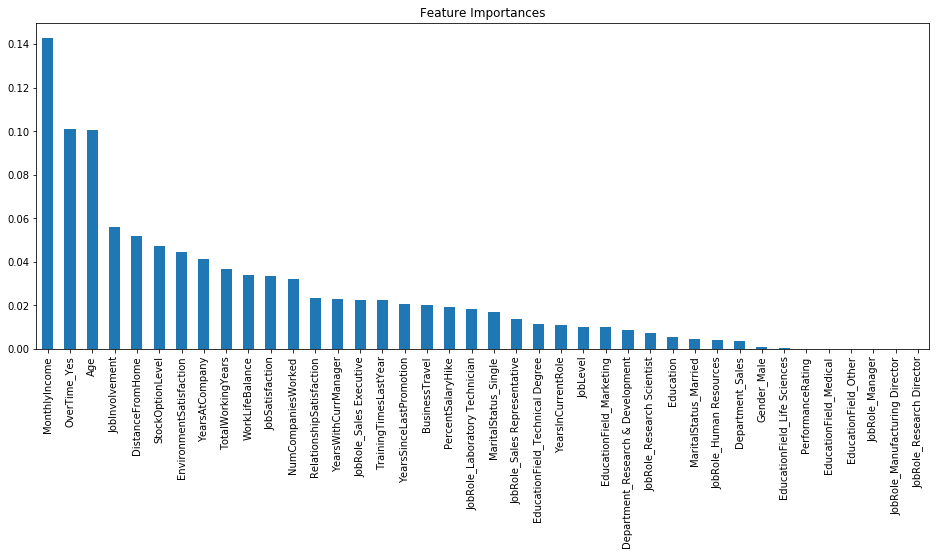

In [71]:
plt.figure(figsize=(16,6))
coef_gbc_1=pd.Series(gbc.feature_importances_, X_train.columns).sort_values(ascending=False)
coef_gbc_1.plot(kind='bar', title='Feature Importances')

In [72]:
coef_gbc_1

MonthlyIncome                        0.142606
OverTime_Yes                         0.101003
Age                                  0.100581
JobInvolvement                       0.055944
DistanceFromHome                     0.051930
StockOptionLevel                     0.047472
EnvironmentSatisfaction              0.044508
YearsAtCompany                       0.041382
TotalWorkingYears                    0.036745
WorkLifeBalance                      0.033880
JobSatisfaction                      0.033578
NumCompaniesWorked                   0.032048
RelationshipSatisfaction             0.023283
YearsWithCurrManager                 0.022947
JobRole_Sales Executive              0.022447
TrainingTimesLastYear                0.022256
YearsSinceLastPromotion              0.020701
BusinessTravel                       0.020064
PercentSalaryHike                    0.019386
JobRole_Laboratory Technician        0.018331
MaritalStatus_Single                 0.016795
JobRole_Sales Representative      

In [73]:
coldrop=list(coef_gbc_1[coef_gbc_1<0.015].index)
coldrop

['JobRole_Sales Representative',
 'EducationField_Technical Degree',
 'YearsInCurrentRole',
 'JobLevel',
 'EducationField_Marketing',
 'Department_Research & Development',
 'JobRole_Research Scientist',
 'Education',
 'MaritalStatus_Married',
 'JobRole_Human Resources',
 'Department_Sales',
 'Gender_Male',
 'EducationField_Life Sciences',
 'PerformanceRating',
 'EducationField_Medical',
 'EducationField_Other',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director']

In [74]:
final_data_gbc=final_data.drop(coldrop,axis=1)

### 3.3.1 Gradien Boosting Classifier After Feature Selection

In [75]:
X_train, X_test, y_train, y_test = train_test_split(final_data_gbc.drop('Attrition', axis=1), final_data_gbc['Attrition'], test_size=0.2, random_state=123)

In [76]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
predictTrain_gbc_2=gbc.predict(X_train)
predictTest_gbc_2=gbc.predict(X_test)

In [78]:
print(classification_report(y_train,predictTrain_gbc_2))
print('-------------')
print(classification_report(y_test,predictTest_gbc_2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       977
           1       0.99      0.70      0.82       199

    accuracy                           0.95      1176
   macro avg       0.96      0.85      0.90      1176
weighted avg       0.95      0.95      0.94      1176

-------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       256
           1       0.71      0.39      0.51        38

    accuracy                           0.90       294
   macro avg       0.82      0.69      0.73       294
weighted avg       0.89      0.90      0.89       294



In [79]:
precision_gbc_2=precision_score(y_test,predictTest_gbc_2)
recall_gbc_2=recall_score(y_test,predictTest_gbc_2)
accuracy_gbc_2=accuracy_score(y_test,predictTest_gbc_2)

In [80]:
list_recall=[]
list_recall.append(['Chi Square with RFC',precision_chisquare_rfc, recall_chisquare_rfc, accuracy_chisquare_rfc, len(final_data[selected_columns].columns)])
list_recall.append(['Chi Square with GBC',precision_chisquare_gbc, recall_chisquare_gbc, accuracy_chisquare_gbc,len(final_data[selected_columns].columns)])
list_recall.append(['RFC Before FeatureImportances',precision_rfc_1, recall__rfc_1, accuracy__rfc_1, len(final_data.columns)-1])
list_recall.append(['RFC After FeatureImportances',precision_rfc_2, recall__rfc_2, accuracy__rfc_2, len(final_data_rfc.columns)-1])
list_recall.append(['GBC Before FeatureImportances',precision_gbc_1, recall__gbc_1, accuracy_gbc_1, len(final_data.columns)-1])
list_recall.append(['GBC After Feature Importances',precision_gbc_2, recall_gbc_2, accuracy_gbc_2, len(final_data_gbc.columns)-1])

In [81]:
df_report=pd.DataFrame(list_recall, columns=['Methods', 'Precision','Recall', 'Accuracy', 'Feature_Amount']).sort_values("Recall", ascending=False)
df_report

,Methods,Precision,Recall,Accuracy,Feature_Amount
5,GBC After Feature Importances,0.714286,0.394737,0.901361,21
4,GBC Before FeatureImportances,0.823529,0.368421,0.908163,40
2,RFC Before FeatureImportances,0.785714,0.289474,0.897959,40
3,RFC After FeatureImportances,0.785714,0.289474,0.897959,22
0,Chi Square with RFC,0.666667,0.263158,0.887755,18
1,Chi Square with GBC,0.666667,0.263158,0.887755,18


#### Recall Tertinggi Ada Pada Gradien Boosting Classifier dengan menggunakan GBC Feature Importances. Sehingga metode feature selection yang digunakan adalah GBC Feature Importances.

## Apakah SMOTE akan meningkatkan ketepatan klasifikasi?

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
X_train, X_test, y_train, y_test = train_test_split(final_data_gbc.drop('Attrition', axis=1), final_data_gbc['Attrition'], test_size=0.2, random_state=123)

In [84]:
os = SMOTE(random_state=123)

X_os, y_os = os.fit_sample(X_train, y_train)
X_os = pd.DataFrame(X_os, columns=X_train.columns)
rfc.fit(X_os, y_os)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [85]:
predictTest=rfc.predict(X_test)

In [86]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTest), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    230     26
A Yes    22     16


In [87]:
print(classification_report(y_test,predictTest))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       256
           1       0.38      0.42      0.40        38

    accuracy                           0.84       294
   macro avg       0.65      0.66      0.65       294
weighted avg       0.84      0.84      0.84       294



In [88]:
gbc.fit(X_os,y_os)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
predictTest=gbc.predict(X_test)

In [90]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTest), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    224     32
A Yes    17     21


In [91]:
print(classification_report(y_test,predictTest))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       256
           1       0.40      0.55      0.46        38

    accuracy                           0.83       294
   macro avg       0.66      0.71      0.68       294
weighted avg       0.86      0.83      0.84       294



#### Jawabannya adalah tidak

#### > Mencari paramater terbaik dari setiap algorithm untuk mendapatkan nilai ketepatan klasifikasi terbaik dengan Grid Search.

### 1. Random Forest

In [92]:
from sklearn.model_selection import GridSearchCV

parameters={
           'class_weight':({0:1, 1:5},{0:1,1:6},{0:1, 1:7}),
           'min_samples_leaf':(65,66,67,68,69),
           'min_samples_split':(2,3,4,5,6),
           'n_estimators':(50, 100, 150, 200)}

rfc=RandomForestClassifier(random_state=123)
dt= GridSearchCV(rfc, parameters,
                scoring=['recall','roc_auc'],
                refit='recall', cv=10)

dt.fit(X_train, y_train)
dt.best_estimator_

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 7},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=67,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [93]:
rfc=dt.best_estimator_

#### 1.1 Training Error

In [94]:
predictTrainGS_rf=rfc.predict(X_train)

In [95]:
print(classification_report(y_train, predictTrainGS_rf))

              precision    recall  f1-score   support

           0       0.96      0.56      0.71       977
           1       0.29      0.88      0.44       199

    accuracy                           0.61      1176
   macro avg       0.62      0.72      0.57      1176
weighted avg       0.84      0.61      0.66      1176



In [96]:
con = pd.DataFrame(data=confusion_matrix(y_train,predictTrainGS_rf), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    548    429
A Yes    24    175


In [97]:
predictProbaTrainGS_rf=rfc.predict_proba(X_train)

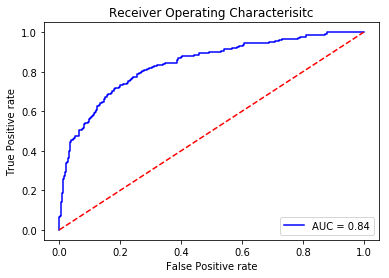

In [98]:
preds = predictProbaTrainGS_rf[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

#### 1.2 Testing Error

In [99]:
predictTestGS_rf=rfc.predict(X_test)

In [100]:
print(classification_report(y_test, predictTestGS_rf))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       256
           1       0.22      0.84      0.34        38

    accuracy                           0.59       294
   macro avg       0.59      0.69      0.52       294
weighted avg       0.86      0.59      0.65       294



In [101]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTestGS_rf), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    140    116
A Yes     6     32


In [102]:
precision_gs_rf=precision_score(y_test,predictTestGS_rf)
recall_gs_rf=recall_score(y_test,predictTestGS_rf)
accuracy_gs_rf=accuracy_score(y_test,predictTestGS_rf)

In [103]:
predictProbaTest=rfc.predict_proba(X_test)

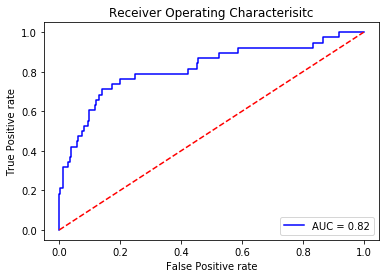

In [104]:
preds = predictProbaTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characterisitc')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

### 2. Gradien Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

parameters={
           'min_samples_leaf':(15,20,25,30,35),
           'n_estimators':(100,150,200),
           'learning_rate':(0.05,0.1,0.15,0.2)}

gbc=GradientBoostingClassifier(min_samples_split=2,max_depth=3, random_state=123)
gs= GridSearchCV(gbc, parameters,
                scoring=['recall','roc_auc'],
                refit='recall', cv=10)

gs.fit(X_train, y_train)
gs.best_estimator_

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=15, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [106]:
gbc=gs.best_estimator_

#### 2.1 Training Error

In [107]:
predictTrainGS_gb=gbc.predict(X_train)

In [108]:
print(classification_report(y_train, predictTrainGS_gb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       977
           1       1.00      0.93      0.97       199

    accuracy                           0.99      1176
   macro avg       0.99      0.97      0.98      1176
weighted avg       0.99      0.99      0.99      1176



In [109]:
con = pd.DataFrame(data=confusion_matrix(y_train,predictTrainGS_gb), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    977      0
A Yes    13    186


#### 2.2 Testing Error

In [110]:
predictTestGS_gb=gbc.predict(X_test)

In [111]:
print(classification_report(y_test, predictTestGS_gb))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       256
           1       0.65      0.39      0.49        38

    accuracy                           0.89       294
   macro avg       0.78      0.68      0.72       294
weighted avg       0.88      0.89      0.88       294



In [112]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTestGS_gb), columns=['P No', 'P Yes'], 
                   index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    248      8
A Yes    23     15


In [113]:
precision_gs_gb=precision_score(y_test,predictTestGS_gb)
recall_gs_gb=recall_score(y_test,predictTestGS_gb)
accuracy_gs_gb=accuracy_score(y_test,predictTestGS_gb)

In [114]:
list_result=[]
list_result.append(['Random Forest',precision_gs_rf,recall_gs_rf,accuracy_gs_rf])
list_result.append(['Gradien Boosting',precision_gs_gb,recall_gs_gb,accuracy_gs_gb])

## Kesimpulan

In [115]:
df_result=pd.DataFrame(list_result, columns=['Methods', 'Precision','Recall', 'Accuracy']).sort_values("Recall", ascending=False)
df_result

,Methods,Precision,Recall,Accuracy
0,Random Forest,0.216216,0.842105,0.585034
1,Gradien Boosting,0.652174,0.394737,0.894558


#### Kesimpulan : Random Forest menghasilkan recall yang lebih tinggi ketimbang Gradien Boosting. Sehingga model yang digunakan adalah Random Forest

In [116]:
import joblib

joblib.dump(rfc,'model_rfc_employee.joblib')

['model_rfc_employee.joblib']